# Lab-7: ANN in Pytorch

In this lab, you will practice simple deep learning model in one of the most popular frameworks, Pytorch.

## Objectives:

1. Theoretical issues
2. Implementation of basic concepts from scratch
3. Get starting in Pytorch

---


### Theoretical issues

Ordinary fully connected neural nets consist of Dense layers, activations, and an output layer.

1. What's the difference between deep learning and normal machine learning?
2. How does a neural network with no hidden layers and one output neuron compare to a logistic/linear regression?
3. How does a neural network with multiple hidden layers but with linear activation and one output neuron compared to logistic/linear regression?
4. Can the perceptron find a non-linear decision boundary?
5. In a multi-hidden layers network, what's the need of a non-linear activation function?
6. Is random weight assignment better than assigning same weights to the units in the hidden layer?

---


## 1) Theory: Feed Forward Neural Network

An artificial neural network consists of:

- Input Layer
- Hidden Layer(s)
- Output Layer

<center>
<img src="./assets/simple_network.png" alt="drawing" style="width:400px;"/> 
</center>

The layers consist of units, typically called "neurons". Each neuron (except inputs) connects with the neurons from the previous layer. Each connection has a weight. These weighted inputs are summed together (a linear combination) then passed through an activation function to get the unit's output.

<center>
<img src="./assets/simple_neuron.png" alt="drawing" style="width:400px;"/> 
</center>

Mathematically this equivalent to:

<center>

$
y = f(w_1x_1 + w_2x_2 + b)
$

$
y = f\left(\sum\_{i=1}^{N} w_ix_i + b\right)
$

$
 y = f(\vec{x}W + b)
$

where $w_{i}$ - weight (just a float number) of connection between i-th neuron from previous layer and the current one; b - bias, one for all connections to this neuron; $x_i$ - the value of i-th neuron.

</center>


### 1.1) Tensors - basic data type in Pytorch

It turns out neural network computations are just a sequence of linear algebra operations on tensors, a generalization of matrices. A vector is a 1-dimensional tensor, a matrix is a 2-dimensional tensor, an array with three indices is a 3-dimensional tensor (RGB color images for example). The fundamental data structure for neural networks are tensors and PyTorch (as well as pretty much every other deep learning framework) is built around tensors.

<img src="./assets/tensor_examples.svg" width="600px">

Just like Numpy arrays, Pytorch tensors can be added, multiplied, subtracted, etc.

#### Let's implement a workflow of simple neuron with tensors


In [1]:
!pip3 install torch
!pip3 install torchvision
!pip3 install tqdm


In [2]:
import torch


def sigmoid_activation(x):
    """ Sigmoid activation function 

        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))


**Note**. A reminder: sigmoid function looks like this:

<img src='./assets/sigmoid.jpeg' width=300px>


We generate data we need to compute the output of the neuron. We have 5 input features, just random for now.


In [3]:
# Generate some data and set the random seed so things are predictable
torch.manual_seed(7)

# Input features, 5 random normal variables
x = torch.randn((1, 5))

# True weights for our data, random normal variables again
weights = torch.randn_like(x)

# True bias term
bias = torch.randn((1, 1))

print(f"Input vector for neuron: {x}")
print(f"Weights of input: {weights}")
print(f"Bias : {bias}")


Input vector for neuron: tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])
Weights of input: tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]])
Bias : tensor([[0.3177]])


**Task 1**: Calculate the output of the neuron with input features `x`, weights `weights`, and bias `bias`. Similar to Numpy, PyTorch has a [`torch.sum()`](https://pytorch.org/docs/stable/torch.html#torch.sum) function, as well as a `.sum()` method on tensors, for taking sums. Feed this linear sum to the `activation` function to complete the computation.


In [4]:
# Compute the output here
y = sigmoid_activation(torch.sum(x*weights)+bias)
print(f"Output of neuron: {y}")


Output of neuron: tensor([[0.1595]])


#### Matrix multiplication in Pytorch

In general, matrix multiplication is more preferable than simple summation and multiplication because of high-performance computing of this operation on modern GPUs. Thus, your next task:


**Task 2**: Do the same operation as in **Task 1** using matrix multiplication

You may use [`torch.mm()`](https://pytorch.org/docs/stable/torch.html#torch.mm) or [`torch.matmul()`](https://pytorch.org/docs/stable/torch.html#torch.matmul) for multiplication of tensors.

Do not forget to reshape one of them \(`x` or `weights`, that is your task to choose the proper one\) to avoid an error. You can apply an operator `.view(a,b)` on a tensor to reshape it into $a,b$ shape.


In [5]:
# Original shapes, to help you undersand how to reshape
# Remember, at the end of computation you sould get a scalar, as in the previous task
print(f"Shape of weight matrix: {weights.shape}")
print(f"Shape of input vector: {x.shape}")

# Your solution here
# Reshape the weights and the input vector to be column vectors
weights = weights.view(5, 1)
sigmoid_activation(torch.mm(x, weights)+bias)


Shape of weight matrix: torch.Size([1, 5])
Shape of input vector: torch.Size([1, 5])


tensor([[0.1595]])

### 1.2) Multi layer network

We saw how to compute the output of a single unit network. The power of neural networks comes when multiple units are stacked into layers.
The output of one layer of neurons becomes the input for the next layer. Now the weights should be expressed as a matrix.

<img src='./assets/multilayer_diagram_weights.png' width=450px>

The bottom layer here are the inputs, surprisingly called the **input layer**. The middle layer is called the **hidden layer**, and the final layer (top) is the **output layer**. We can express this network mathematically with matrices again and use matrix multiplication to get linear combinations for each unit in one operation. For example, the hidden layer ($h_1$ and $h_2$ here) can be calculated:

$$
\vec{h} = [h_1 \, h_2] =
\begin{bmatrix}
x_1 \, x_2 \cdots \, x_n
\end{bmatrix}
\cdot
\begin{bmatrix}
           w_{11} & w_{12} \\
           w_{21} &w_{22} \\
           \vdots &\vdots \\
           w_{n1} &w_{n2}
\end{bmatrix}
$$

The output for this small network is found by treating the hidden layer as inputs for the output unit. The network output:

$$
y = f_2(f_1(\vec{x}\mathbf{W_2} + B_1)\mathbf{W_2} + B_2)
$$


In [6]:
# Generate some data
torch.manual_seed(7)

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network

# Number of input units, must match number of input features
n_input = features.shape[1]
# Number of hidden units
n_hidden = 2
# Number of output units
n_output = 1

# Weights from inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights from hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# Bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))


**Task 3:** Calculate and print the output for this multi-layer network using the weights `W1` & `W2`, and the biases, `B1` & `B2`. The correct value should be `tensor([[0.3171]])`


In [7]:
# Your solution

output = sigmoid_activation(
    torch.mm(sigmoid_activation(torch.mm(features, W1)+B1), W2)+B2)
output


tensor([[0.3171]])

### 1.3) Pytorch Autograd

Training of neural networks through back propagation requires computation of gradients. Pytorch does it for you automatically: tensors track their computational history and support gradient computation if you set the flag `requires_grad=True` in tensor.

The `backward()` function is responsible for calculation of gradients and accumulate (not apply) them in respective tensors

The tensor with `requires_grad=True` has attribute to check the gradients values : `grad`


In [8]:
x = torch.tensor(5.0, requires_grad=True)


Let's consider a function of x: $$f(x) = x^2 + 2x + 1$$

The following code will compute and **accumulate** the gradient w.r.t $x$:


In [9]:
# Compute function f(x) = x^2 + 2x + 1
z = x ** 2 + 2*x + 1
print(z, z.requires_grad)

print(f"Gradient on tensor before backward(): {x.grad}")
# Compute and propagate the gradient
z.backward()
print(f"Gradient on tensor after backward(): {x.grad}")


tensor(36., grad_fn=<AddBackward0>) True
Gradient on tensor before backward(): None
Gradient on tensor after backward(): 12.0


Run the previous cell several times and see how the value of the gradient changes. Because the gradient is accumulated everytime you call `backward()` it is important to zero the accumulated values before any calculations, i.e., `x.grad = None` or `zero_grad()` for optimizers.


In [10]:
x.grad = None


To prevent PyTorch from tracking the history and forming the backward graph, the code can be wrapped inside with torch.no_grad(): it will make the code run faster whenever gradient tracking is not needed.


In [11]:
with torch.no_grad():
    x = torch.tensor(5.0, requires_grad=True)
    print(f"x.requires_grad {x.requires_grad}")

    z_no_grad = x ** 2 + 2*x + 1

    # Even if x requires gradient, we cannot compute the gradient of function z_no_grad inside this block
    print(
        f"Value of z: {z_no_grad}, Requires grad?: {z_no_grad.requires_grad}")
    # z.backward()  will trigger an error, because no gradient is tracked


x.requires_grad True
Value of z: 36.0, Requires grad?: False


### 1.4) Tensor to numpy array and vice-versa

PyTorch has a great feature for converting between Numpy arrays and Torch tensors. To create a tensor from a Numpy array, use `torch.from_numpy()`. To convert a tensor to a Numpy array, use the `.numpy()` method.


In [12]:
import numpy as np
a = np.random.rand(4, 3)
a


array([[0.53741964, 0.79216522, 0.08433291],
       [0.45178396, 0.44744   , 0.74770844],
       [0.62828983, 0.33255308, 0.54063755],
       [0.17160639, 0.78759008, 0.78440083]])

In [13]:
b = torch.from_numpy(a)
b


tensor([[0.5374, 0.7922, 0.0843],
        [0.4518, 0.4474, 0.7477],
        [0.6283, 0.3326, 0.5406],
        [0.1716, 0.7876, 0.7844]], dtype=torch.float64)

In [14]:
b.numpy()


array([[0.53741964, 0.79216522, 0.08433291],
       [0.45178396, 0.44744   , 0.74770844],
       [0.62828983, 0.33255308, 0.54063755],
       [0.17160639, 0.78759008, 0.78440083]])

## 2) Model Design in Pytorch

Now we're going to build a larger network that can solve a (formerly) difficult problem - identifying text on an image. We'll use the **MNIST dataset** consisting of grayscale handwritten digits. Each image has 28x28 pixels, you can see the samples below:

<img src="./assets/mnist.png" width="500px">

Our goal is to build a neural network that takes one of these images and predicts the corresponding digit.

We have three parts that we need to build:

1. **Data Loading process** - how to handle data in Pytorch.
2. **Model building** - how to create a neural network with desirable parameters.
3. **Training loop** - how to properly train the model and evaluate its performance.


### 2.1) Data Loading

1. **Data Transformations** - similar to data preprocessing techniques that we used before, but more image-oriented. You can specify a sequence of transformations, such as normalization, cropping (getting the region of image), resizing, etc.
2. **Data Source** - load of built-in (or custom) data sets. For a data set you can specify the transformations from the previous step, and Pytorch will transform each sample automatically.
3. **Data Loader** - Pytorch class that makes working with the data sets easy and fast. For example, it can iterate over the batches of data during the training for you


In [15]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# We work with a group of samples, i.e. batches, instead of single images.
# Usually batch_size is some power of 2.
# The bigger batch_size accelerates the training, but requires more memory
batch_size = 32
test_batch_size = 100

# 1. Data Transformations.
# transforms.Compose allows to make a series of transformations
data_transformations = transforms.Compose([
    transforms.ToTensor(),
    # Normalize an image with mean 0.1307 and standard deviation 0.3081.
    transforms.Normalize((0.1307,), (0.3081,))
])
# 2. Data Source.
# Download MNIST dataset, if it's needed, to '../data' folder
mnist_train = datasets.MNIST('../data', train=True, download=True,
                             transform=data_transformations)
# train=False - that's how test and train sets are separated in torchvision.datasets
mnist_test = datasets.MNIST('../data', train=False,
                            transform=data_transformations)

# 3. Data Loader.
train_loader = DataLoader(mnist_train,
                          batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test,
                         batch_size=test_batch_size, shuffle=True)


Label=0


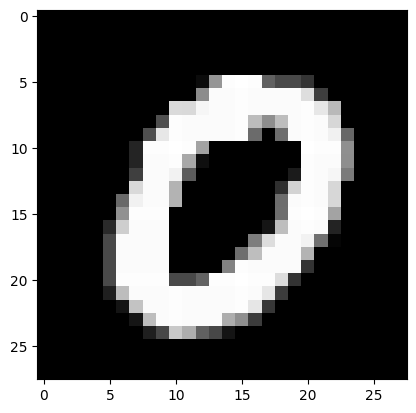

In [16]:
import matplotlib.pyplot as plt
# Get the next batch from loader
images, labels = next(iter(train_loader))

# Get the first image from batch. Note, because of shuffling you may get another image
print(f"Label={labels[0]}")
plt.imshow(images[0].reshape(28, 28), cmap="gray")


### 2.2) Model building

Pytorch provides a module `nn` that makes building networks relatively simple. To create your own network you need to:

1. Create a class and inherit it from `nn.Module`. This is the main parent class for all Pytorch models.
2. Implement a constructor, i.e. a function `def __init__(self): ...`, where you should describe the architecture of a network and its parameters.
3. Define a function `def forward(self, x): ...`, which gets the input batch `x` as an argument, creates the flow of data through the defined layers and returns the answer.

#### Example of the _same network_ that we've already implemented from scratch:


In [17]:
# For layers and models
import torch.nn as nn
# For activation functions (F.sigmoid is deprecated)
import torch.nn.functional as F
from torch import sigmoid

# Specify the hardware for model run, choose GPU if possible
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")


# Definition of the very simple network with 1 hidden layer
class ToyNet(nn.Module):
    def __init__(self):
        # Invoke the parent's constructor
        super(ToyNet, self).__init__()
        # nn implements feedworward layer as nn.Linear(a, b),
        # where a, b - input and output dims of weight matrix.
        # Bias is included by default.
        self.hidden = nn.Linear(3, 2)
        self.output = nn.Linear(2, 1)

    def forward(self, x):
        # You can write the result of sigmoid to a local variable,
        # but the common style in torch is to re-write x after computation of each layer
        x = sigmoid(self.hidden(x))
        x = self.output(x)
        return sigmoid(x)


model = ToyNet().to(device)

print(f"ToyNet model architecture:\n {model}")
print("\n")

toy_x = torch.randn((1, 3))
# Feed the sample to the model like this
print(f"Prediction of {toy_x} : {model(toy_x)}")
# ... or like this
print(f"Prediction of {toy_x} by .forward : {model.forward(toy_x)}")
# You can also feed the batch
toy_xs = torch.randn((4, 3))
print(f"Prediction on batch: {model(toy_xs)}")

ToyNet model architecture:
 ToyNet(
  (hidden): Linear(in_features=3, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
)


Prediction of tensor([[-1.0587,  0.3344, -0.7804]]) : tensor([[0.4100]], grad_fn=<SigmoidBackward0>)
Prediction of tensor([[-1.0587,  0.3344, -0.7804]]) by .forward : tensor([[0.4100]], grad_fn=<SigmoidBackward0>)
Prediction on batch: tensor([[0.4309],
        [0.4010],
        [0.4142],
        [0.3929]], grad_fn=<SigmoidBackward0>)


**Note**. This network is not trained yet and does some meaningless calculations. Here we just got acquainted with the representation on NN in PyTorch. Training process will be discussed in the further snippets.


#### Activation functions

The choice of activation function is important for architecture construction, because it leads to different non-linearity of a layer. For now we worked with sigmoid only, but usually (not necessary) it is applied on the output layer only. **ReLU** (Rectified Linear Unit) is a quite popular activation function for hidden layers:

<img src='./assets/ReLU.png' width=300px>


**Task 4:** Complete the implementation of the following network to solve the classification task on MNIST

<img src='./assets/Model.png' width=700px>

So, you should specify 2 hidden layers with 256 and 100 neurons respectively, and an output layer with 10 neurons (probability of the classes). Your network will get an image, or 28x28 matrix, and flatten it to 1D array. You also should write the flow of this input array through the network, resulting in a 1x10 array (for one image). Hidden layers should be activited by _ReLU_, output - by _Logarithmyc SoftMax_.


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Shape of 1st hidden linear layer: (input_array_size, 256)
        self.hidden1 = nn.Linear(28*28, 256)
        # (256, 100)
        self.hidden2 = nn.Linear(256, 100)
        # (100, 10)
        self.output = nn.Linear(100, 10)

    # The batch x is of size (batch, 28 * 28)
    def forward(self, x):
        # Flatten of 2D image to 1D array
        x = x.view(-1, 28*28)
        # Complete the flow in hidden layers and output
        x = F.relu(self.hidden1(x))
        return F.log_softmax(x, dim=1)


model = Net().to(device)

print(model)


Net(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=10, bias=True)
)


### 2.3) Training loop

We should define the loops over the batches and run the training on. Lets specify the hyperparameters of the model first.


In [19]:
# Number of iterations over the whole data set
epochs = 5
# Learning rate for Stochastic Gradient Descent
lr = 0.01
# SGD parameter to accelerate the optimization, check https://paperswithcode.com/method/sgd-with-momentum
momentum = 0.5
# Loss function - cross entropy, the multiclass variant of that you used in Lab 3
criterion = nn.CrossEntropyLoss()


In [20]:
from tqdm import tqdm


def train(model, device, train_loader, optimizer, epoch):
    # Do not forget to set train() to update weights of model
    model.train()
    # A wrapper over data loader to show progress bar
    bar = tqdm(train_loader)
    iteration = 0
    overall_loss = 0
    for data, target in bar:
        # Device of data and model must be the same
        data, target = data.to(device), target.to(device)
        # To avoid an accumulation of gradients
        optimizer.zero_grad()
        # Prediction
        output = model(data)
        # Error between prediction and ground truth
        loss = criterion(output, target)
        # Compute gradient
        loss.backward()
        # Update params of model
        optimizer.step()

        iteration += 1
        overall_loss += loss.item()
        bar.set_postfix({"Loss": format(overall_loss/iteration, '.6f')})


In [21]:
def test(model, device, test_loader):
    # Do not forget to set eval() to keep model's params the same
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # Sum up batch loss
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            # get the index of the max log-probability
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    test_loss /= len(test_loader.dataset)
    print(
        f"Test set: Average loss: {test_loss}, Accuracy: {100. * correct / len(test_loader.dataset)} ")


In [22]:
# Collection of optimizers
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

# Optionally, you can save the params of model to file
# torch.save(model.state_dict(), "mnist_model.pt")


100%|██████████| 1875/1875 [00:31<00:00, 58.77it/s, Loss=0.458064]


Test set: Average loss: 3.0399936161041257e-05, Accuracy: 91.38 


100%|██████████| 1875/1875 [00:32<00:00, 57.95it/s, Loss=0.301256]


Test set: Average loss: 2.941259195327759e-05, Accuracy: 91.75 


100%|██████████| 1875/1875 [00:34<00:00, 54.75it/s, Loss=0.288341]


Test set: Average loss: 2.7830084571838383e-05, Accuracy: 92.05 


100%|██████████| 1875/1875 [00:20<00:00, 89.44it/s, Loss=0.280782] 


Test set: Average loss: 2.77871253490448e-05, Accuracy: 92.02 


100%|██████████| 1875/1875 [00:18<00:00, 101.42it/s, Loss=0.275607]


Test set: Average loss: 2.7654248666763304e-05, Accuracy: 92.26 


How to check if the neural network model is overfitting?
